# Data Mining Process Overview

The process we will be following throughout this course is known as the **Cross-Industry Standard Process for Data Mining (CRISP-DM), **one of the most widely used methods for data mining.

The CRISP-DM process is made up of several parts:

1. **Data  **
2. **Business Understanding and Data Understanding **(iterative)
3. **Data Preparation and Data Modeling **(iterative/dependent)
4. **Evaluation**
5. **Deployment**

Data mining is not a clear-cut process and sometimes may require you to go back to part one even after getting to your evaluation.

The first part of the process, **Business Understanding, **requires you to understand what it is you are trying to achieve from a business perspective. This will involve measuring the criteria which will determine whether or not the project was successful.  

When developing a business understanding, it should be known there are 3 potential outcomes when it comes to data mining:

1. **Descriptive - using data to develop insights into what already happened**
2. **Predictive - using data to forecast potential future outcomes**
3. **Prescriptive - using data to guide decision making**


Let's look at Zillow, an online real estate marketplace, as an example of how someone may pose questions differently depending on these 3 potential outcomes:

1. Descriptive - What kind of houses sell fast?
2. Predictive - How much will this house sell for?
3. Prescriptive - What listings should be featured?

The next step in our process, which goes hand-in-hand with **Business Understanding,** is **Data Understanding. **Understanding your data will require you to process what data you will need and how to get that data. You may collect it yourself, use publicly available data, or purchase data.

Once there is a clear understanding of what you are trying to achieve and how you plan to achieve it, you will move on to the next step, **Data Preparation, **which will allow you to perform data mining techniques on that data. Preparing your data can involve many different steps, including but not limited to: dealing with missing variables or outliers, rescaling your data, and creating dummy variables for qualitative values.

At the **Modeling **stage, you will need to determine what type of data mining process to apply. This will require you to determine if this is a problem where there is an intended problem or outcome that can be a variable. If so, it will have you using a **supervised model. **If there is not then you will be using an **unsupervised model. **We will discuss these models in more detail later on in the chapter.

We see that the **Data Preparation **and** Modeling **stages are closely related; this is because our data modeling is dependent on the way we structure our data. Once we have decided on a model for our data, it is time for the **Evaluation** stage. For predictive models, we see how well the model works based on the use of an entirely _new_ dataset. The comparison of this new data with the original model will gauge predictive accuracy. 

Depending on the results of the evaluation, we now may be ready for the final stage or we may need to revert back to the original stage. The final stage of the process is the **Deployment **stage. This is where the model is ready to be released and shared for implementation. It is important to note that though this is the final stage, the data mining cycle is continuous and ongoing. As such, it is very likely this model will be revised in the future.

Now we are going to see what the data will look like. We use a table to represent the dataset where each row is a record/observation and each column is variable. A record/observation could be information about a specific customer or a specific property if you are a company like Zillow. The variables reflect different pieces of information about each record.

Suppose we want to collect information about Gies Business students. 

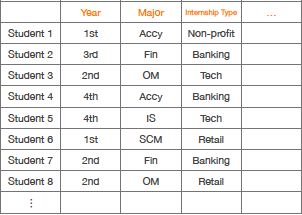

Each row will correspond to a single student and the columns represent information about each student, such as their year, major and what type of internship they most recently completed. It is likely that you will be dealing with large databases when working for a company. In this case, it is impractical to work with a sample of the dataset in order to build and test your model.

The process of taking a sample from the dataset and using it to create your final model with which you will make predictions for records in the larger database is called **scoring**. In this case, sample refers to a collection of observations, but in the machine learning community, sample refers to a single record.

It is important to note data points in your sample will have an impact on your model. Particularly, an imbalanced sample which doesn’t reflect the broader population will lead to algorithmic bias.

An example of this is Amazon using AI when trying to screen job applications. Going through thousands of applications seemed like a monotonous job, so Amazon figured they could use AI to automate the process and they did just that in 2014. One issue came with how Amazon built their model: by scanning through past applicant resumes. The majority of past applications were from male applicants, which led the AI algorithm to penalize women applicants for going to woman schools and even having the word “woman” in their resume. Amazon ultimately discarded this project in 2018 as its algorithm was shown to be discriminatory. Algorithms are meant to alleviate human biases, not to exacerbate them.

There are two main types of variables: numerical and categorical.

**Numerical variables** can either be continuous, meaning they can be any real number, or an integer. These variables usually do not require special processing.

**Categorical variables** are used to represent categories or classes. They can be coded as either text or integers. Categorical variables can be either nominal or ordinal, nominal being unordered and ordinal being ordered. An example of a **nominal variable** is gender, as there is no meaningful ranking between male and female. **Ordinal variables**, on the other hand, do have an inherent characteristic order with labels such as low, medium and high. In order for a machine learning algorithm to process categorical data that is text, it needs to be converted to numbers.

Nominal variables would be converted to dummy variables, usually taking a value of either 0 or 1, whereas ordinal variables would be converted to integers which represent their inherent ranking. Let's look at an example of this using student data.

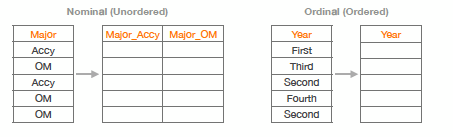

Majors are an example of nominal variables, as they do not have any inherent order or ranking between them. In order to turn these variables into numbers, we need to create dummy variables.

We would create 2 new columns: Major_Accy and Major_OM. In the Major_Accy column, we would put a 1 for that row if the student is an accounting major and a 0 otherwise. We would follow the same rule for the Major_OM column. The other column would be considered an ordinal value as order does matter, so we would use values such as “First” through “Fourth” year, and convert those to numbers 1-4 to place in the appropriate row based on the student’s year in school.

```random_df = pd.get_dummies(data_df, prefix_sep='_', drop_first=True)
random_df.columns
```

Converting variables is a very common data pre-processing step. Other common steps in the data pre-processing stage include detecting and possibly removing outliers, handling missing data, and normalizing data.

As you may have noticed, many of our variable names include underscores as opposed to spaces. Stripping leading and trailing spaces is an important part of cleaning up your data and reformatting it so that it is Python-friendly.
```
new_names = [s.strip().replace(' ', '_') for s in random_df.columns]
random_df.columns = new_names
random_df.columns
```
Additionally, in order to begin analyzing our data, we will need to split the predictor and outcome variables. We can accomplish this by:

```
X = random_df.drop('outcome_variable', axis=1) # all variables EXCEPT outcome variable

y = random_df.outcome_variable # just the outcome variable
```

Converting variables is a very common data pre-processing step. Other common steps in the data pre-processing stage include detecting and possibly removing outliers, handling missing data, and normalizing data.

**Outliers**

An **outlier** is an extreme observation, meaning that it is something that is further away from the other data points. These outliers can end up significantly affecting the outcome of the model.

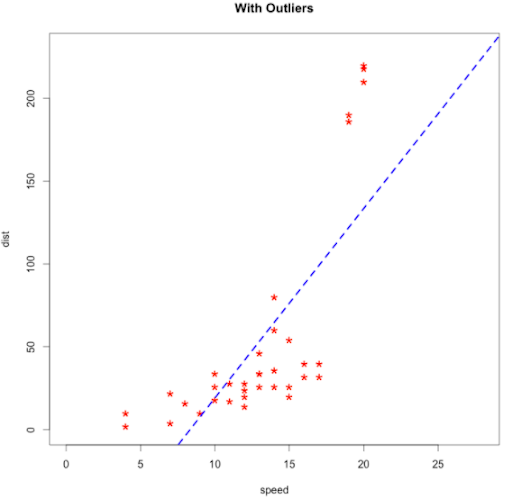

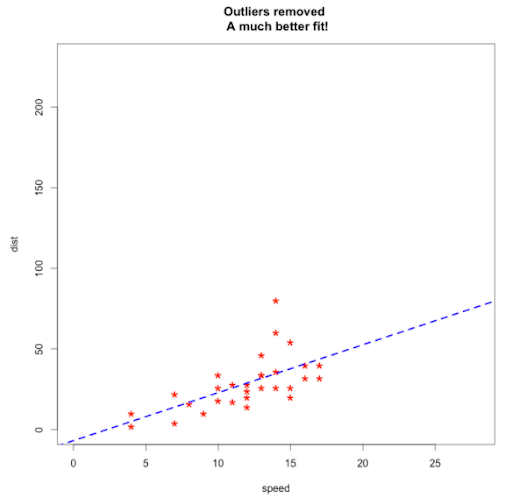

In the figure, we see the independent variable speed on the horizontal axis and the dependent variable distance on the vertical axis. We’ve plotted two graphs: one with outliers (above) and one without (below). We see that the majority of our data points are on the bottom left of the graph, with only a few points at the upper right hand corner (graph above).  A simple regression line is fit, and we observe the slope of this graph is pretty steep. 

When we remove the outliers and fit the model again (graph below), the line has a significantly less steep slope. In the second model, the prediction of distance for larger speed values is significantly smaller than that in the first model.

When outliers are identified, removing them is not always necessary. However, outliers must be detected and then carefully examined. You must use your domain knowledge to determine whether or not they are appropriate to keep in the dataset.

**Missing Values** 

Another issue you will face is **missing values** in your dataset. You should expect that when you get a dataset, some records will not have data for every single variable.

There are different ways to deal with this. The first solution to this problem is **omission**.

Your missing data could be concentrated in a small number of records. In the example shown above, missing data appears only in Records 3 and 6, so we could simply choose to omit those records.

If your data is concentrated in a small number of variables, you can remove that variable from your dataset. Since we see missing data only occurs in variable 2, we would omit that column from our data frame. However, you may not want to omit entire records or variables because you would lose the information that they do contain.

Another option would be to replace the missing values with a substitute such as the mean or median of all the records. This process is called **imputation**.

Let’s use imputation to handle missing values in the dataset above. 

In this example, we will replace the three missing values with the mean. The first missing value is Variable 1 for Record 2. We take the sum of the variable values for the other three records, which is 9, and divide by 3 to get the result of 3. The second missing value is Variable 3 for Record 2. In this case, the sum of the remaining variable values is 16 and we must divide by 3 to get 16/3.The final missing value is Variable 4 for Record 3. Taking the sum of the remaining values, we get 8 and must again divide by 3 to get 8/3.

**Rescaling Data**

The fourth and final pre-processing step we’ll discuss is **rescaling data**. 

Sometimes you may come across a dataset that has vastly different ranges of values. Take for example a data frame storing values for prices of homes, which would be in the range of thousands, and other variables such as number of rooms, which would likely not be over the teen values. 

For some machine learning algorithms, this difference in scale will negatively affect performance, so we rescale the data. 

There are two ways we can rescale:

First, we can **standardize** the data for a given variable. To do this we would need to calculate the mean and standard deviation for that variable. Then, for each observation for that variable, we subtract the average and divide by the standard deviation.

A second option is to **normalize** the data. In this case, we want to rescale all of the values for a given variable to be between 0 and 1. We do this by subtracting the minimum variable value from  each possible value and dividing it by the range of values.

For the following example where we have 6 records and we want to normalize the variable # of rooms, how would we do this?

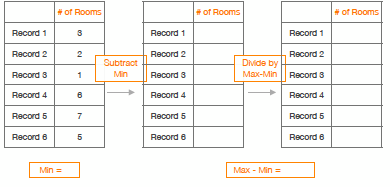

We must subtract the minimum value and divide by the range.

We will do this step by step.

First, we see the minimum value of this variable, # of rooms, is 1 and the range (max-min) is 6. Let's subtract 1 from each record, which yields variable values of 2, 1, 0, 5, 6, and 4. Now we will divide by our range, 6, giving us ⅓, ⅙ , 0, ⅚ ,1, ⅔  We have now normalized the data for this variable. 

To recap the steps of data preparation:

*   First, you begin by sampling data from the larger database.
*   Next, you convert some variables, usually converting categorical variables from text to integers. Nominal variables are converted into a series of dummy variables, and ordinal variables are converted to integers which preserve order.
*   Then, you inspect the data for outliers and use your domain knowledge to determine whether or not to remove them.
*   You also must decide how to handle missing data, either through omission of variables/ records or using imputation to fill them in with the median or mean values.
*   Finally, you might need to rescale your data to account for extremely different ranges. You can do this either by standardizing or normalization data.

We will talk about different data mining algorithms we can use and how to evaluate and select the best model.
